# Data Scientist Udacity Nanodegree

# Project 1  - Blog Post
  

## Companies and Cities Driving Together Towards a Sustainable World

##### Insights from CDP Survey Data
Reference:  
Kaggle Competition “CDP - Unlocking Climate Solutions City-Business Collaboration for a Sustainable Future”  
[CDP - Unlocking Climate Solutions | Kaggle](https://www.kaggle.com/c/cdp-unlocking-climate-solutions/overview)

## 0. Preparing the notebook

In [1]:
# installing packages
#!pip install pandas==1.0.3
#!pip install numpy==1.18.1
#!pip install matplotlib==3.1.3
#!pip install seaborn==0.10.1
#!pip install scikit-learn==0.22

In [2]:
# importing packages
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, f1_score, recall_score, precision_score

In [3]:
# setting colors
old_cmap = cm.get_cmap('ocean')
cmap = colors.ListedColormap(old_cmap(np.linspace(0.0, 0.9)))

In [4]:
# auxiliary functions

def total_count(df, col1, col2, value_col2):
    '''
    DESCRIPTION:
    A function to get total individually counts from multiple responses in a row
    Ref: https://github.com/udacity/DSND_Term2/blob/master/lessons/CRISP_DM/test1.py, refactored
        
    INPUT:
    df - the pandas dataframe to search
    col1 - the column name to look through
    col2 - the column name to count values from
    value_col2 - the specific value of col2 to search
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    
    # list of strings you want to search for in each row of df[col1]
    df_aux = df[df[col2] == value_col2].copy()
    desc_df = df_aux[col1].str.split(';', expand = True)
    desc = []
    for col in desc_df.columns:
        for v in desc_df[col].unique():
            desc.append(v)
    look_for = pd.Series(desc).str.strip().dropna().unique().tolist()
        
    df = df_aux[col1].value_counts().reset_index()
    df.rename(columns={'index': col1, col1: 'count'}, inplace=True)
        
    new_df = defaultdict(int)
    #loop through list of types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the response type is in the row, add it
            if val in df[col1][idx]:
                new_df[val] += int(df['count'][idx])
                # print(val,df['count'][idx])
    #clean up the resulting dataframe
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1,'count']
    new_df.sort_values(by = 'count', ascending=False, inplace=True)
    return new_df

## 1. Business Understanding

The data come from the surveys carried out from three subsequent years by CDP, a global non-profit organization. The  questionnaires asks companies and cities about themes like environmental planning, governance, climate change, water security, energy, risk assessments, etc.  
Every year, the organizations are scored and those who are considered _leadership_ on environmental issues are listed and [published](https://www.cdp.net/en/scores) by CDP.

##### Loading the data

In [5]:
path_cities = 'data/Cities/'
path_corp = 'data/Corporations/'

# Loading Disclosing Data
# Loading Corporations Climate Data
corp_climate_disclosing_2020_df = pd.read_csv(path_corp + 'Corporations Disclosing/Climate Change/2020_Corporates_Disclosing_to_CDP_Climate_Change.csv')
corp_climate_disclosing_2019_df = pd.read_csv(path_corp + 'Corporations Disclosing/Climate Change/2019_Corporates_Disclosing_to_CDP_Climate_Change.csv')
corp_climate_disclosing_2018_df = pd.read_csv(path_corp + 'Corporations Disclosing/Climate Change/2018_Corporates_Disclosing_to_CDP_Climate_Change.csv')

# Loading Corporations Water Security Data
corp_water_disclosing_2020_df = pd.read_csv(path_corp + 'Corporations Disclosing/Water Security/2020_Corporates_Disclosing_to_CDP_Water_Security.csv')
corp_water_disclosing_2019_df = pd.read_csv(path_corp + 'Corporations Disclosing/Water Security/2019_Corporates_Disclosing_to_CDP_Water_Security.csv')
corp_water_disclosing_2018_df = pd.read_csv(path_corp + 'Corporations Disclosing/Water Security/2018_Corporates_Disclosing_to_CDP_Water_Security.csv')

# Loading Cities Data
cities_disclosing_2020_df = pd.read_csv(path_cities + 'Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv')
cities_disclosing_2019_df = pd.read_csv(path_cities + 'Cities Disclosing/2019_Cities_Disclosing_to_CDP.csv')
cities_disclosing_2018_df = pd.read_csv(path_cities + 'Cities Disclosing/2018_Cities_Disclosing_to_CDP.csv')


# Loading Responses Data
# Responses to the survey by cities
cities_responses_2020_df = pd.read_csv(path_cities + 'Cities Responses/2020_Full_Cities_Dataset.csv')
cities_responses_2019_df = pd.read_csv(path_cities + 'Cities Responses/2019_Full_Cities_Dataset.csv')

# Responses to the survey about climate change by companies
corp_responses_2020_df = pd.read_csv(path_corp + 'Corporations Responses/Climate Change/2020_Full_Climate_Change_Dataset.csv')
corp_responses_2019_df = pd.read_csv(path_corp + 'Corporations Responses/Climate Change/2019_Full_Climate_Change_Dataset.csv')

C:\Users\rejoliveira\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Data Understanding

To better understand the questionnaires, let's take a look at its structure.

##### Generating the questionnaires' structure from the data

In [6]:
# The Corporations questionnaire structure about climate change
pd.DataFrame(corp_responses_2020_df.groupby(['module_name','column_name','data_point_name'])['response_value']\
             .unique()
            ) #.to_excel('data/processed/corp_questionnaire_2020.xlsx')

response_value
module_name      column_name                                        data_point_name                                                                                      
C0. Introduction C0.1                                               C0.1Give a general description and introduction...  [Gibson Energy Inc. (Gibson) is a Canadian-bas...
                 C0.2_C1Start date                                  C0.2_C1_State the start and end date of the yea...  [2019-01-01, 2019-08-01, 2019-07-01, 2019-04-0...
                 C0.2_C3Indicate if you are providing emissions ... C0.2_C3_State the start and end date of the yea...                                     [No, Yes, nan]
                 C0.2_C4Select the number of past reporting year... C0.2_C4_State the start and end date of the yea...                    [nan, 1 year, 3 years, 2 years]
                 C0.3                                               C0.3Select the countries/areas for which you wi...  [Canada, Belgium; Canada; United Kingdom of Gr...
...                                                                                                                                                                   ...
C8. Energy       C8.2e_C1Sourcing method                            C8.2e_C1_Provide details on the electricity, he...  [nan, None (no purchases of low-carbon electri...
                 C8.2e_C2Low-carbon technology type                 C8.2e_C2_Provide details on the electricity, he...  [nan, Other, please specify: Renewable energy,...
                 C8.2e_C3Country/region of consumption of low-ca... C8.2e_C3_Provide details on the electricity, he...  [nan, Germany, United States of America, Austr...
                 C8.2e_C4MWh consumed accounted for at a zero em... C8.2e_C4_Provide details on the electricity, he...  [nan, 78.52, 12075.26, 7717.17, 1889.93, 8519....
                 C8.2e_C5Comment                                    C8.2e_C5_Provide details on the electricity, he...  [nan, CCL's facilities in Vinhedo and Criciuma...

[223 rows x 1 columns]

In [7]:
# Number of questions in the Climate Corporations Questionnaire
corp_responses_2020_df['data_point_name'].nunique()

220

In [8]:
# The Cities questionnaire structure
pd.DataFrame(cities_responses_2020_df.sort_values(by = 'Question Number')\
             .groupby(['Section','Question Number','Question Name','Column Name','Row Name'])\
             ['Response Answer'].unique()\
            ) #.to_excel('data/processed/cities_questionnaire_2020.xlsx')

Response Answer
Section                     Question Number Question Name                                      Column Name                                        Row Name                                                                                          
Adaptation Actions          3.1             Describe how your city identified and prioritiz... Comment                                            Identifying and prioritizing adaptation actions  [nan, Question not applicable, The Climate Act...
                                                                                               Method                                             Identifying and prioritizing adaptation actions  [Question not applicable, nan, Stakeholder con...
Adaptation Planning         3.2b            Please explain why there is no published plan t... Comment                                            Please explain                                   [Question not applicable, nan, A climate actio...
                                                                                               Reason                                             Please explain                                   [Question not applicable, Adaptation is covere...
Adaptation Planning Process 3.4             Does your local/regional government apply a Mon... Description of Monitoring and Evaluation (M&E) ... Monitoring & Evaluation (M&E) system             [Question not applicable, In 2019, Decree 4607...
...                                                                                                                                                                                                                                              ...
Waste                       13.6            Does your city have any of the following initia... Response                                           Volume based waste collection fees/incentives    [Question not applicable, No, Do not know, Yes...
Water Supply                14.2b           Please explain why you do not consider your cit... Please explain                                     Please explain                                   [Question not applicable, City vulnerability a...
                                                                                               Reason                                             Please explain                                   [City water supply is secure, Question not app...
Water Supply Management     14.4b           Please explain why your city does not have a pu... Please explain                                     Please explain                                   [Question not applicable, nan, EBMUD agency ha...
                                                                                               Reason                                             Please explain                                   [Question not applicable, Other, please specif...

[710 rows x 1 columns]

In [9]:
# Number of Questions in the Cities Questionnaire
cities_responses_2020_df['Question Number'].nunique()

166

### EDA -  Exploratory Data Analysis

Let's set some **Research Questions** to guide our data exploration:  
1. Is there an increase in the survey engagement by country over the years? More cities? More organizations?  
2. How about the engagement with the survey itself? Do the respondents answer all the questions?
3. Do cities collaborate with companies? And do companies collaborate with cities?
4. Do organizations engage their value chain?  
5. Can we estimate the level of engagement?

### 2.1.1 - Research Question #1
**Is there an increase in the _survey engagement_ over the years, by country?** 

In [10]:
# create a dataframe with the total respondents per year for question 1
all_dfs = {'2018': {'corp_climate': corp_climate_disclosing_2018_df, 
                   'corp_water': corp_water_disclosing_2018_df,
                   'cities': cities_disclosing_2018_df},
           '2019': {'corp_climate': corp_climate_disclosing_2019_df, 
                   'corp_water': corp_water_disclosing_2019_df,
                   'cities': cities_disclosing_2019_df},
           '2020': {'corp_climate': corp_climate_disclosing_2020_df, 
                   'corp_water': corp_water_disclosing_2020_df,
                   'cities': cities_disclosing_2020_df}
          }

q1_df = pd.DataFrame()
for index, dfs in all_dfs.items():
    for col, df in dfs.items():
        try:
            q1_df.loc[index, col] = df['account_number'].nunique()
        except:
            q1_df.loc[index, col] = df['Account Number'].nunique()
q1_df

,corp_climate,corp_water,cities
2018,650.0,209.0,641.0
2019,965.0,271.0,861.0
2020,980.0,295.0,566.0


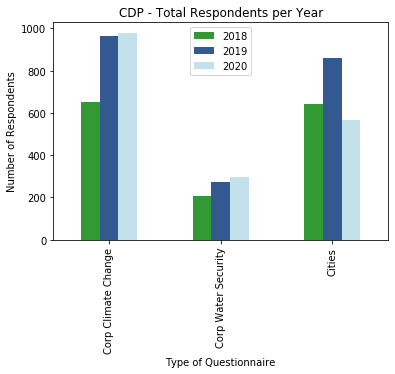

In [11]:
# visualizing the totals
q1_df.rename(columns = {'corp_climate': 'Corp Climate Change', 
                        'corp_water': 'Corp Water Security',
                        'cities': 'Cities'})\
.T.plot(kind = 'bar', cmap=cmap, alpha = .8,
        title = 'CDP - Total Respondents per Year')
plt.xlabel('Type of Questionnaire')
plt.ylabel('Number of Respondents')
plt.savefig('results/cdp total respondents.png', bbox_inches='tight', facecolor = None)
plt.show()

**Insight #1:** The number of companies increased over the years, while the number of cities decreased in the last year.

**Which countries have most increased the respondents?**

In [12]:
# countries respondents per year

# create a dataframe from all Cities DataFrames 
all_cities = {'2018':  cities_disclosing_2018_df,
              '2019':  cities_disclosing_2019_df,
              '2020':  cities_disclosing_2020_df
          }
all_cities_df = pd.DataFrame()

for year, df in all_cities.items():
    cities_df_aux = df.groupby('Country')['Account Number'].nunique().reset_index()
    cities_df_aux['year'] = year
    all_cities_df = pd.concat([all_cities_df, cities_df_aux])
    
# all cities respondents grouped by country and year
country_df = all_cities_df.groupby(['year','Country'])['Account Number'].sum().unstack(level = 'year', fill_value = 0)

# create a new column to compute the difference between 2020 and 2019 total respondents
country_df['diff_2020:2019'] = country_df['2020'] - country_df['2019']
country_df

year,2018,2019,2020,diff_2020:2019
Country,,,,
Albania,1,1,0,-1
Argentina,8,80,14,-66
Australia,8,14,10,-4
Bangladesh,1,1,1,0
Belgium,0,1,0,-1
...,...,...,...,...
Uruguay,1,1,1,0
Venezuela (Bolivarian Republic of),0,1,0,-1
Viet Nam,2,4,0,-4


In [13]:
# visualizing the difference between total respondents per year
country_df.sort_values(by = '2019', ascending = False)\
.style.bar(subset=['diff_2020:2019'], align='mid', color=['#d65f5f', '#5fba7d'])

year,2018,2019,2020,diff_2020:2019
Country,,,,
United States of America,162,181,144,-37
Brazil,96,111,68,-43
Argentina,8,80,14,-66
Mexico,18,31,28,-3
Italy,25,29,15,-14
Canada,25,27,25,-2
Colombia,24,26,19,-7
Portugal,27,26,18,-8
Peru,9,20,15,-5


**Insight #2:**  
The decrease in cities respondents happened remarkably in United States, Brazil and Argentina.  
There are countries that increased their respondents: United Kingdom, Finland, Republic of Korea, Costa Rica, Turkey e Netherlands.

In [14]:
# countries respondents per year

# create a dataframe from all corporates climate DataFrames 
all_corps = {'2018':  corp_climate_disclosing_2018_df ,
              '2019':  corp_climate_disclosing_2019_df ,
              '2020':  corp_climate_disclosing_2020_df 
          }
all_corps_df = pd.DataFrame()

for year, df in all_corps.items():
    corps_df_aux = df.groupby('country')['account_number'].nunique().reset_index()
    corps_df_aux['year'] = year
    all_corps_df = pd.concat([all_corps_df, corps_df_aux])
    
# all corps climate change respondents grouped by country and year
corp_country_df = all_corps_df.groupby(['year','country'])['account_number'].sum().unstack(level = 'year', fill_value = 0)

# create a new column to compute the difference between 2020 and 2019 total respondents
corp_country_df['diff_2020:2019'] = corp_country_df['2020'] - corp_country_df['2019']
corp_country_df

year,2018,2019,2020,diff_2020:2019
country,,,,
Canada,88,112,121,9
United States of America,562,853,859,6


In [15]:
# visualizing the difference between total respondents per year
corp_country_df.sort_values(by = '2019', ascending = False)\
.style.bar(subset=['diff_2020:2019'], align='mid', color=['#d65f5f', '#5fba7d'])

year,2018,2019,2020,diff_2020:2019
country,,,,
United States of America,562,853,859,6
Canada,88,112,121,9


**Insight #3:**  
As the corporations respondents come from only two countries, there are not many interesting things to explore here.

### 2.1.2 - Research Question #2
How about the engagement with the survey itself? **Do the respondents answer all the questions?**

In [16]:
# Let's see how much of the survey the cities have answered
cities_missing_answers = pd.DataFrame(cities_responses_2020_df.groupby('Question Number')\
['Response Answer'].apply(lambda x: x.isna().sum()/len(x))\
.sort_values(ascending=False))
cities_missing_answers.style.format("{:.1%}")

,Response Answer
Question Number,
10.4,73.8%
0.2,73.5%
8.4,70.1%
12.0,68.9%
10.0,50.2%
12.1,47.6%
8.2,40.5%
6.5,40.0%
8.1,38.0%


In [17]:
# Let's see how much of the survey the organizations have answered
corp_missing_answers = pd.DataFrame(corp_responses_2020_df.groupby('question_number')\
['response_value'].apply(lambda x: x.isna().sum()/len(x))\
.sort_values(ascending=False))
corp_missing_answers.style.format("{:.1%}")

,response_value
question_number,
C6.3,81.8%
C6.1,79.2%
C8.2d,76.2%
C4.1c,73.0%
C12.1d,70.0%
C8.2a,69.9%
C4.2b,67.6%
C4.1b,65.2%
C6.4a,64.9%


### 2.1.3 - Research Question #3
**Do cities _collaborate_ with companies?**  
Let's dive into some interesting questions from the survey.

In [18]:
# Question 1.0 - Do the cities have goals?
print('Question to Cities:', 
      cities_responses_2020_df[cities_responses_2020_df['Question Number'] == '1.0']['Question Name'].unique()[0])
print('Proportion of cities with no answer:', cities_missing_answers.loc['1.0','Response Answer'])
cities_responses_2020_df[cities_responses_2020_df['Question Number'] == '1.0']['Response Answer'].value_counts()

Question to Cities: Does your city incorporate sustainability goals and targets (e.g. GHG reductions) into the master planning for the city?
Proportion of cities with no answer: 0.0176678445229682


Yes                                             410
In progress                                      73
Intending to incorporate in the next 2 years     47
Do not know                                      18
Not intending to incorporate                      8
Name: Response Answer, dtype: int64

In [19]:
# Question 6.2 - Do cities and companies collaborate?
print('Question to Cities:', 
      cities_responses_2020_df[cities_responses_2020_df['Question Number'] == '6.2']['Question Name'].unique()[0])
print('Proportion of cities with no answer:', cities_missing_answers.loc['6.2'])
cities_responses_2020_df[cities_responses_2020_df['Question Number'] == '6.2']['Response Answer'].value_counts()

Question to Cities: Does your city collaborate in partnership with businesses in your city on sustainability projects?
Proportion of cities with no answer: Response Answer    0.086572
Name: 6.2, dtype: float64


Yes                                           392
In progress                                    47
Intending to undertake in the next 2 years     44
Do not know                                    27
Not intending to undertake                      7
Name: Response Answer, dtype: int64

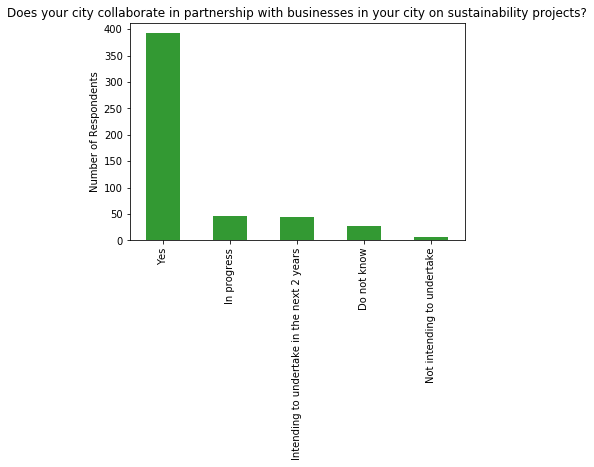

In [20]:
# visualizing the collaboration
title_6_2 = cities_responses_2020_df[cities_responses_2020_df['Question Number'] == '6.2']['Question Name'].unique()[0]
cities_responses_2020_df[cities_responses_2020_df['Question Number'] == '6.2']['Response Answer'].value_counts()\
.plot(kind = 'bar', cmap=cmap, alpha = .8, title = title_6_2)
plt.xlabel('')
plt.ylabel('Number of Respondents')
plt.savefig('results/cities_companies_colab.png', bbox_inches='tight', facecolor = None)
plt.show()

**Insight #4:**  
Most of the cities respondents say they have incorporated sustainability goals into their plannings and they collaborate with companies in sustainability issues. Nice!  
But what about the *companies*? Do they *collaborate* with governments? Let's see.

### 2.1.4 - Research Question #4
**Do companies _collaborate_ with cities or other stakeholders from their value chain?** 

In [23]:
# Question c12.3 - Do the companies engage in activities that influence public policy on climate-related issues? 
# How many answered it?
title_c12_3 = str(corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.3')]['data_point_name'].unique()[0])
print(title_c12_3)
print('Proportion of No Answers:', round(corp_missing_answers.loc['C12.3']*100,1))

C12.3Do you engage in activities that could either directly or indirectly influence public policy on climate-related issues through any of the following?
Proportion of No Answers: response_value    21.9
Name: C12.3, dtype: float64


In [24]:
# Question c12.3 - Do the companies engage in activities that influence public policy on climate-related issues?
print(corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.3')]['data_point_name'].unique())
print('No answer:', corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.3')]['response_value'].isna().sum())
corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.3')]['response_value'].value_counts()

['C12.3Do you engage in activities that could either directly or indirectly influence public policy on climate-related issues through any of the following?']
No answer: 215


Trade associations                                                                                 171
No                                                                                                 152
Direct engagement with policy makers; Trade associations                                            97
Direct engagement with policy makers; Funding research organizations; Trade associations            67
Direct engagement with policy makers; Funding research organizations; Other; Trade associations     58
Direct engagement with policy makers; Other; Trade associations                                     49
Other; Trade associations                                                                           45
Other                                                                                               44
Direct engagement with policy makers                                                                31
Funding research organizations; Trade associations                       

**Insight #5:**  
The answer most frequent is "no answer". What should we infer from it? That they don't influence public policies or they don't know?  

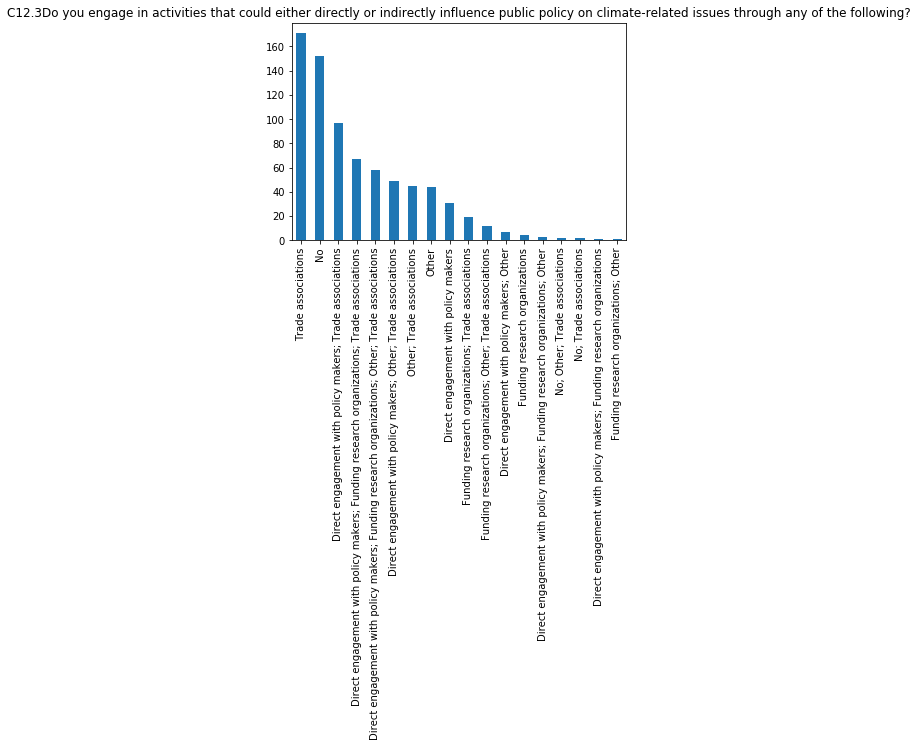

In [25]:
title_c12_3 = str(corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.3')]['data_point_name'].unique()[0])
corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.3')]['response_value']\
.value_counts()\
.plot(kind = 'bar', title = title_c12_3);

The answers are combined; let's separate them to have a clear view:

In [26]:
corp_question_c12_3_df = total_count(corp_responses_2020_df, 'response_value', 'question_number', 'C12.3')
corp_question_c12_3_df

,response_value,count
1,Trade associations,522
0,Direct engagement with policy makers,313
3,Other,221
4,Funding research organizations,165
2,No,156


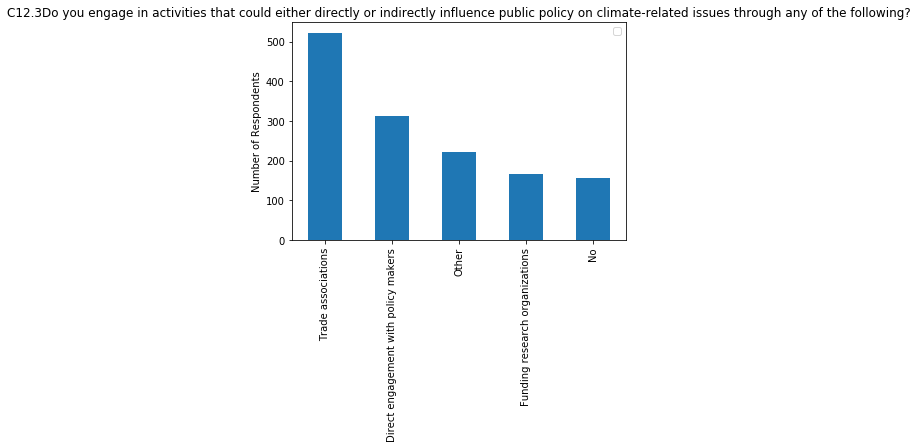

In [27]:
corp_question_c12_3_df.set_index('response_value').plot(kind = 'bar', title = title_c12_3)
plt.xlabel('')
plt.ylabel('Number of Respondents')
plt.legend('')
plt.savefig('results/companies_colab.png', bbox_inches='tight', facecolor = None)
plt.show()

**Insight #6:**  
When there is an answer about influence in public policies, organizations point that the most common type  is for trade associations.

What about the value chain?

In [28]:
# Question c12.1 - Does the company engage with its value chain?
print(corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.1')]['data_point_name'].unique())
print('No answer:', corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.1')]['response_value'].isna().sum())
corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.1')]['response_value'].value_counts()

['C12.1Do you engage with your value chain on climate-related issues?']
No answer: 8


No, we do not engage                                                                                           225
Yes, our customers; Yes, our suppliers                                                                         215
Yes, other partners in the value chain; Yes, our customers; Yes, our suppliers                                 188
Yes, our customers                                                                                              98
Yes, our suppliers                                                                                              91
Yes, other partners in the value chain; Yes, our suppliers                                                      56
Yes, other partners in the value chain; Yes, our customers                                                      43
Yes, other partners in the value chain                                                                          32
Yes, other partners in the value chain; Yes, our customers; Yes, our investee co

In [29]:
# count unique values for question c12.1
corp_question_c12_1_df = total_count(corp_responses_2020_df, 'response_value', 'question_number', 'C12.1')
corp_question_c12_1_df

,response_value,count
3,"Yes, our suppliers",569
1,"Yes, our customers",562
0,"Yes, other partners in the value chain",333
2,"No, we do not engage",225
4,"Yes, our investee companies",24


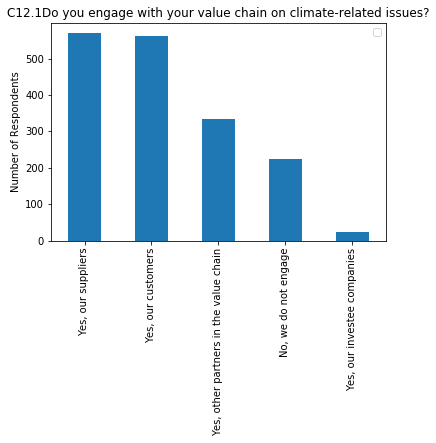

In [30]:
title_c12_1 = str(corp_responses_2020_df[(corp_responses_2020_df['question_number'] == 'C12.1')]['data_point_name'].unique()[0])
corp_question_c12_1_df.set_index('response_value').plot(kind='bar', title = title_c12_1)
plt.xlabel('')
plt.ylabel('Number of Respondents')
plt.legend('')
plt.savefig('results/companies_valuechain.png', bbox_inches='tight', facecolor = None)
plt.show()

### 2.1.5 - Research Question #5
## **_Can we estimate the level of engagement?_**  
\
This is challenging. Here we propose to evaluate the engagement with enviromental issues by measuring how much the organizations have filled the questionnaires. We wonder if the number of missing values in the responses could be a latent variable for engagement. The hypothesis is: the less missing responses, the more engaged the organization is.  
\
The most engaged organizations were considere those labeled as "leadership" and entered the A-list published by CDP ([link here](https://www.cdp.net/en/scores))  
Now it's possible to construct a classification model where the target is:    
1: strongly engaged -  name of organization in next year A-list  
0: weakly engaged - name of organization not in next year A-list  
\
The features are the missing values in the response questionnaire.  
\
So let's go to the next steps following CRISP-DM:

## 3. Data Preparation

In [31]:
# the dataset for modeling
df = cities_responses_2019_df[['Account Number',
       'Organization', 'Country', 'Section',
       'Question Number', 'Question Name', 'Column Number', 'Column Name',
       'Row Number', 'Row Name', 'Response Answer']].copy()

In [32]:
# Reading the target file: 2020 Cities A-list (Ref: https://www.cdp.net/en/scores)
a_list_df = pd.read_excel('cities_A-list_2020.xlsx')
a_list_df

,City,Region
0,Ajuntament de Barcelona,Europe
1,Auckland Council,Southeast Asia and Oceania
2,Ayuntamiento de Hermosillo,Latin America
3,Ayuntamiento de Murcia,Europe
4,Ayuntamiento de Vitoria-Gasteiz,Europe
...,...,...
83,The Local Government of Quezon City,Southeast Asia and Oceania
84,"Town of Breckenridge, CO",North America
85,"Town of Vail, CO",North America
86,Västervik,Europe


#### Feature Engineering

In [33]:
df['is_valid_answer'] = np.where(df['Response Answer'].isna(),
                      int(0),
                      int(1))

In [34]:
df.groupby('Question Number')['is_valid_answer'].apply(lambda x: x.sum()/len(x)*100)\
.sort_values(ascending=False)

Question Number
Response Language    100.000000
1.1b                 100.000000
0.1                   98.341523
2.0                   96.928747
4.4                   96.795580
                        ...    
1.2                   17.500000
1.5                    7.142857
10.8                   0.000000
0.2                    0.000000
10.16                  0.000000
Name: is_valid_answer, Length: 157, dtype: float64

In [35]:
# creating the features dataframe where index = organizations and features = questions 
# and values = proportion of not missing values (answers) for each feature (questions)

df_aux = pd.pivot_table(df, values='is_valid_answer', 
                        index=['Organization'],
                        columns=['Question Number'], 
                        aggfunc= lambda x: x.sum()/len(x)*100,
                        fill_value = 0
                       )

In [36]:
df_aux

Question Number,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.0a,1.1,1.11,...,8.6,8.6a,8.6b,9.0,9.1,9.2,9.3,9.4,Amendments_question,Response Language
Organization,,,,,,,,,,,,,,,,,,,,,
Abasan Al-Kabira Municipality,100,0,100,100,100,100,100,100.0,100,0,...,0,0.000000,0,0,0,0,0,0.000000,0,100
Abington Township,100,0,100,100,100,100,100,100.0,100,0,...,100,0.000000,100,0,0,0,0,0.000000,0,100
Abuja Federal Capital Territory,100,0,100,0,100,0,100,0.0,100,0,...,100,0.000000,0,0,0,0,0,0.000000,0,100
Accra Metropolitan Assembly,100,0,75,100,100,100,100,100.0,100,100,...,100,0.000000,0,40,90,100,100,33.333333,0,100
Addis Ababa City Administration,100,0,100,100,100,100,100,100.0,100,100,...,100,61.538462,0,80,100,100,100,66.666667,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yaoundé 4,100,0,75,100,100,100,100,70.0,100,0,...,0,0.000000,0,0,0,0,0,0.000000,0,100
Yilan County Government,100,0,100,100,100,100,100,100.0,100,0,...,100,0.000000,0,0,0,0,0,0.000000,0,100
Zhenjiang Municipal People's Government,100,0,50,100,50,100,0,0.0,0,0,...,100,93.750000,0,0,0,0,0,0.000000,0,100


#### Labeling the target

In [37]:
df_aux['is_leadership'] = np.where(df_aux.index.isin(a_list_df['City']),
                      int(1),
                      int(0))

In [38]:
df_aux['is_leadership'].value_counts()

0    731
1     83
Name: is_leadership, dtype: int64

Target is imbalanced; need to consider it in modeling.

#### The final dataset

In [39]:
df_aux.describe().style.format("{:.1f}")

Question Number,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.0a,1.1,1.11,1.12,1.13,1.14,1.15,1.1a,1.1b,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,10.0,10.1,10.11,10.12,10.13,10.15,10.16,10.2,10.3,10.4,10.5,10.6,10.7,10.7a,10.8,10.9,11.0,11.1,12.0,12.1,12.2,12.3,12.4,12.5,13.0,13.1,13.2,13.3,13.4,13.5,13.6,14.0,14.1,14.2,14.3,14.3a,14.3b,14.4,14.5,14.5a,14.5b,2.0,2.0a,2.0b,2.0c,2.1,2.2,3.0,3.1,3.1a,3.1b,3.2,4.0,4.1,4.11,4.11a,4.11b,4.12,4.13,4.13a,4.2,4.3,4.3a,4.4,4.5,4.6a,4.6b,4.6c,4.6d,4.6e,4.6f,4.7,4.8,4.9,5.0,5.0a,5.0b,5.0c,5.0d,5.0e,5.1,5.2,5.2a,5.3,5.3a,5.4,5.5,5.5a,5.5b,6.0,6.1,6.11,6.1a,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.7a,7.7b,7.8,7.9,7.9a,7.9b,8.0,8.0a,8.0b,8.1,8.2,8.3,8.4,8.5,8.6,8.6a,8.6b,9.0,9.1,9.2,9.3,9.4,Amendments_question,Response Language,is_leadership
count,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0,814.0
mean,98.3,0.0,92.5,95.2,88.1,95.3,92.5,57.1,96.7,11.7,12.2,12.0,12.5,9.6,62.8,0.5,0.9,1.1,0.7,0.2,9.7,8.4,2.6,9.8,39.9,28.1,8.0,6.1,0.1,3.5,0.0,5.0,4.2,4.4,18.9,4.5,69.9,7.5,0.0,4.2,8.2,6.3,32.8,4.8,4.1,3.8,47.1,5.2,8.0,8.1,7.5,3.8,3.7,4.9,7.1,81.0,72.7,67.8,82.8,52.2,12.2,46.6,64.7,23.1,7.6,96.9,65.6,45.5,1.5,82.7,67.6,54.4,89.4,41.3,2.0,35.6,94.8,67.9,56.5,10.8,24.6,33.2,56.3,5.6,35.4,50.2,31.1,65.1,43.2,10.5,8.3,1.9,0.3,0.7,1.0,0.6,47.2,35.5,90.7,29.2,4.6,3.0,7.7,22.9,16.6,46.7,23.3,46.2,3.0,39.9,86.1,35.0,11.7,68.8,78.5,5.0,47.2,42.8,9.6,9.6,4.8,8.5,5.5,7.4,9.5,88.7,51.3,51.6,36.0,50.0,30.0,28.9,40.4,12.5,14.4,33.8,39.8,6.8,18.0,81.4,24.2,16.2,71.7,28.5,33.4,7.6,11.9,73.5,16.1,13.7,3.3,7.5,6.3,7.7,3.7,2.1,100.0,0.1
std,10.5,0.0,15.6,21.4,22.2,21.1,26.3,48.3,17.9,31.9,32.7,32.6,33.1,29.5,41.1,7.0,9.2,9.1,7.2,3.3,29.6,27.7,15.9,29.8,49.0,40.1,27.1,24.0,1.8,15.9,0.0,20.3,17.7,20.6,31.2,18.2,45.9,25.3,0.0,18.4,27.5,24.2,47.0,21.4,19.7,19.2,40.1,19.5,26.8,27.3,26.3,15.8,15.3,21.6,24.6,39.3,44.6,46.7,37.8,46.2,30.4,44.9,47.8,40.2,24.9,17.3,44.9,45.9,11.7,28.6,43.7,35.5,30.8,43.2,13.0,42.0,22.1,46.6,49.6,29.9,40.9,43.0,49.6,21.9,34.3,41.0,46.3,47.7,43.7,19.0,19.2,12.5,5.7,8.4,9.6,5.6,46.5,38.9,29.1,40.8,19.6,15.8,25.0,39.2,37.2,49.9,42.3,49.9,16.0,36.0,34.6,41.5,30.0,43.4,41.1,21.9,48.0,38.7,29.5,29.5,17.2,27.9,22.9,25.7,29.3,31.7,49.7,50.0,40.1,50.0,40.4,37.9,49.1,30.9,32.8,44.0,49.0,23.6,36.7,38.9,37.8,35.1,45.1,42.7,47.2,26.5,23.6,44.2,33.7,31.9,15.2,25.1,22.5,26.7,15.0,14.3,0.0,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
25%,100.0,0.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [40]:
# Identify the features with no variance (low power to explain the target)
no_variance = df_aux.columns[df_aux.std()==0].tolist()
no_variance

['0.2', '10.16', '10.8', 'Response Language']

## 4. Modeling

In [41]:
rand_state = 42
test_size = .2

In [42]:
#Split into explanatory and response variables
df_aux.drop(columns = no_variance, inplace = True)

response_col = 'is_leadership'

X = df_aux.drop(response_col, axis=1)
y = df_aux[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [43]:
# Build a random forest classifier

# Instantiate; class_weight set to consider the imbalanced classes
rf_model = RandomForestClassifier(n_estimators=10, class_weight='balanced') 

#Fit
rf_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 5. Evaluation

In [44]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.02


91% accuracy seems good! Let's see the other metrics.

In [45]:
scoring = ['accuracy', 'f1_macro','precision_macro', 'recall_macro']

In [46]:
scores = cross_validate(rf_model, X, y, cv = 5, scoring=scoring)

In [47]:
pd.DataFrame([[scores['test_accuracy'].mean(), 
              scores['test_f1_macro'].mean(), 
              scores['test_precision_macro'].mean(),
              scores['test_recall_macro'].mean()]], 
             columns = ['mean_accuracy', 'mean_f1_macro','mean_precision_macro', 'mean_recall_macro'])

,mean_accuracy,mean_f1_macro,mean_precision_macro,mean_recall_macro
0,0.910316,0.647661,0.842624,0.608546


**Insight #7:**  
Although not so high as the accuracy, the overall metrics show that it's possible to predict what organizations are going to be in next year's A-list based on how much of the survey they respond. The engagement to fill the questionnaires can be seen as a latent variable for the organizations' engagement with environmental issues. Interesting, isn't it?

## 6. Conclusion

While exploring these rich dataset from CPD about sustainable issues from cities and companies, I came up with some interesting insights:  
* There were more engagement from corporations to fill the survey over the years, but the number of cities decreased in some countries.  
* The cities say they collaborate with companies, but the companies don't say so, and the collaboration with cities happen mainly by trading associations. 
* The collaboration within the companies' value chain is stronger with their suppliers and customers.  
* The level of engagement needed to classify an organization as leadership (and its inclusion in A-list) can be predicted by how much it responds the previous year questionnaire.